STEP 7 & 8

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


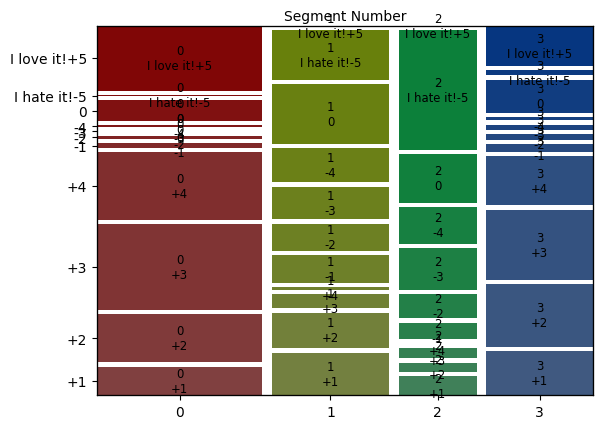

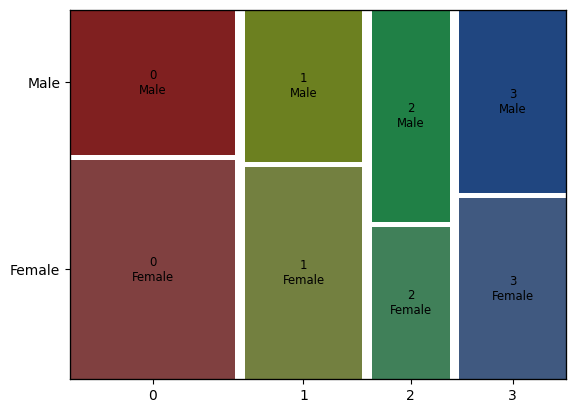

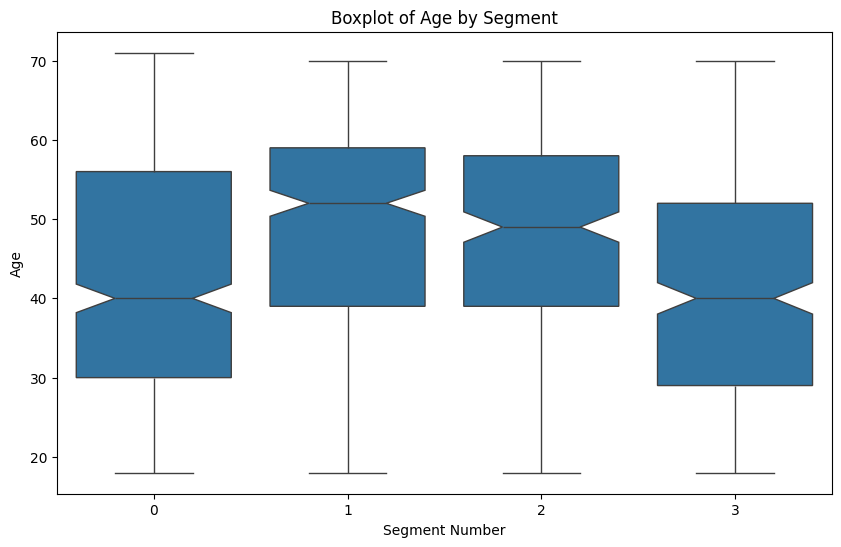

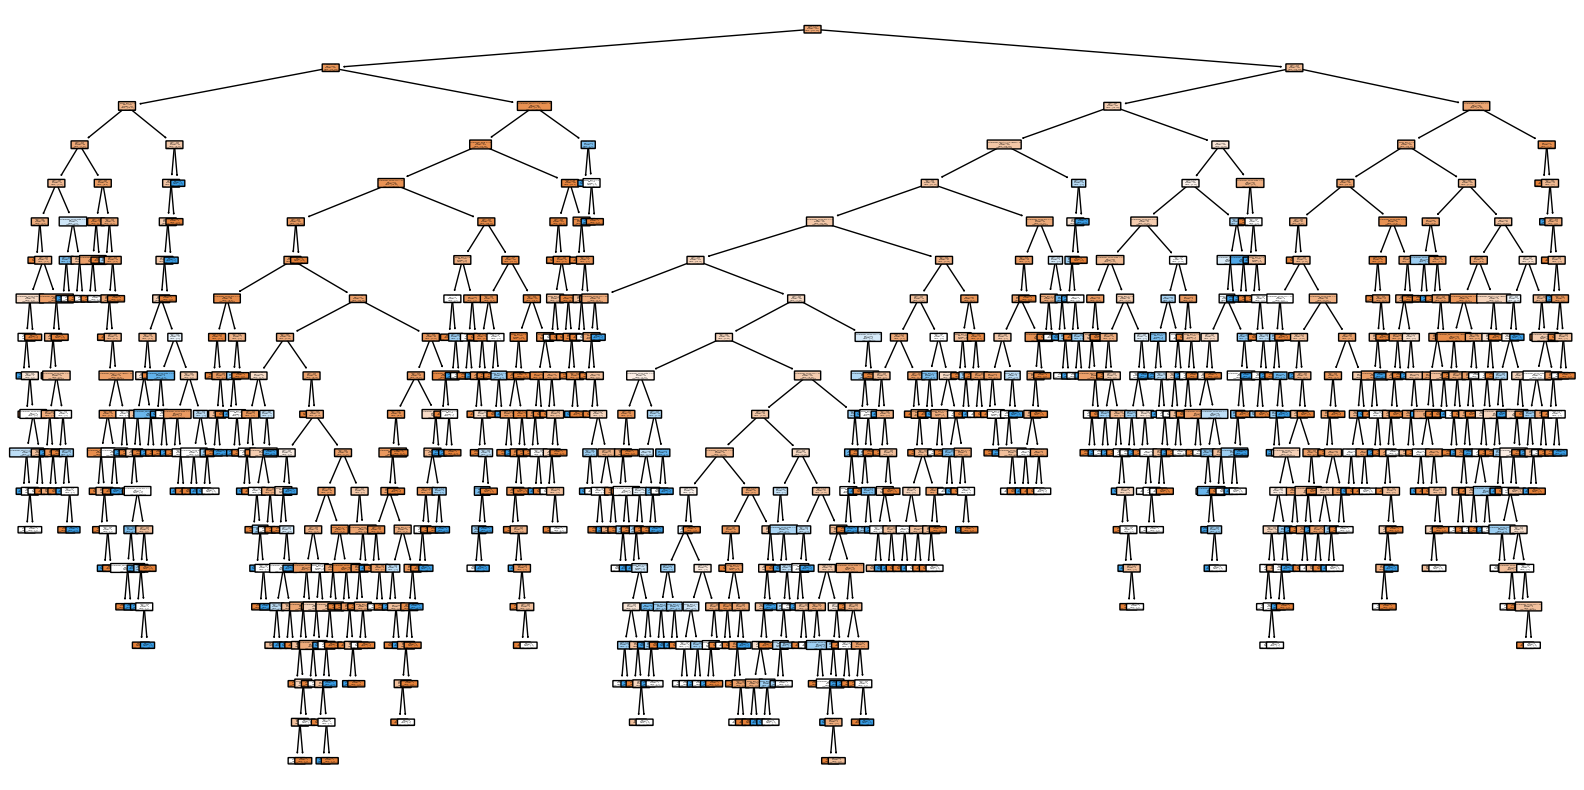

Visit Means: 0    2.614035
1    2.718579
2    2.706612
3    2.536145
Name: VisitFrequency, dtype: float64
Like Means: 0    2.037037
1    0.855191
2   -0.714876
3    2.397590
Name: Like.n, dtype: float64
Female Means: 0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: Gender, dtype: float64


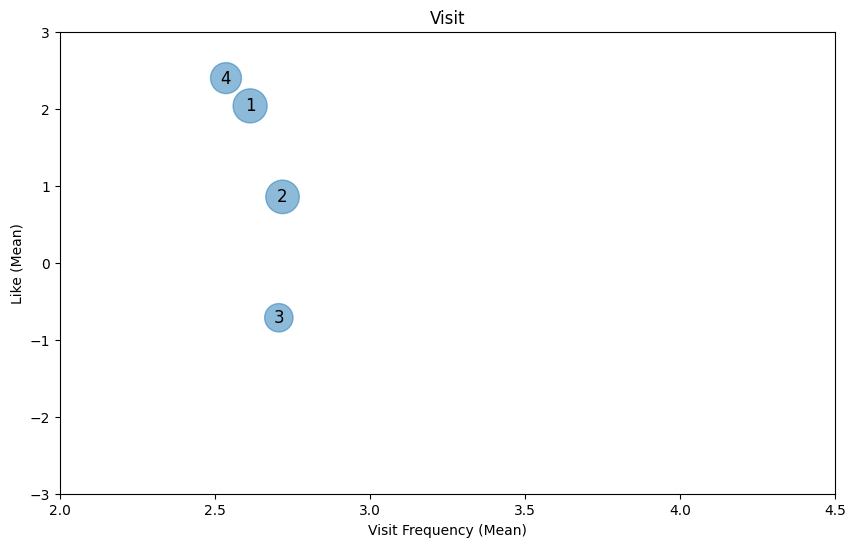

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
import statsmodels.api as sm

# Load the dataset
file_path = '/content/drive/MyDrive/Code Conversion/mcdonalds.csv'
mcdonalds = pd.read_csv(file_path)

# Convert the first 11 columns to a binary matrix
MD_x = mcdonalds.iloc[:, 0:11]
MD_x_binary = (MD_x == "Yes").astype(int)

# Perform KMeans clustering with 4 segments
kmeans = KMeans(n_clusters=4, random_state=1234)
MD_k4 = kmeans.fit_predict(MD_x_binary)
k4 = MD_k4

# Mosaic plot for 'Like'
like_mosaic = pd.crosstab(k4, mcdonalds['Like'])
mosaic(like_mosaic.stack(), title='', axes_label=True, label_rotation=0, gap=0.02)
plt.xlabel('Segment Number')
plt.ylabel('Count')
plt.show()

# Mosaic plot for 'Gender'
gender_mosaic = pd.crosstab(k4, mcdonalds['Gender'])
mosaic(gender_mosaic.stack(), title='', axes_label=True, label_rotation=0, gap=0.02)
plt.show()

# Boxplot for 'Age'
plt.figure(figsize=(10, 6))
# The varwidth argument is not supported, removing it
sns.boxplot(x=k4, y=mcdonalds['Age'], notch=True)
plt.xlabel('Segment Number')
plt.ylabel('Age')
plt.title('Boxplot of Age by Segment')
plt.show()

# Decision tree to predict segment 3
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Prepare the data
mcdonalds['Like.n'] = 6 - mcdonalds['Like'].astype('category').cat.codes
X = mcdonalds[['Like.n', 'Age', 'VisitFrequency', 'Gender']]
X = pd.get_dummies(X, columns=['VisitFrequency', 'Gender'], drop_first=True)
y = (k4 == 3).astype(int)

# Fit the decision tree
tree = DecisionTreeClassifier(random_state=1234)
tree.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True, rounded=True)
plt.show()

# Calculate mean values for VisitFrequency, Like.n, and Gender by segment
visit_means = mcdonalds.groupby(k4)['VisitFrequency'].apply(lambda x: x.astype('category').cat.codes.mean())
like_means = mcdonalds.groupby(k4)['Like.n'].mean()
female_means = mcdonalds.groupby(k4)['Gender'].apply(lambda x: (x == 'Female').mean())

# Print the results
print('Visit Means:', visit_means)
print('Like Means:', like_means)
print('Female Means:', female_means)

# Plot Visit vs. Like with circle size representing the proportion of females
plt.figure(figsize=(10, 6))
plt.scatter(visit_means, like_means, s=1000 * female_means, alpha=0.5)
for i in range(len(visit_means)):
    plt.text(visit_means[i], like_means[i], str(i + 1), fontsize=12, ha='center', va='center')
plt.xlabel('Visit Frequency (Mean)')
plt.ylabel('Like (Mean)')
plt.xlim(2, 4.5)
plt.ylim(-3, 3)
plt.title('Visit')
plt.show()